# Projeto Simulação 5 - SIR
  ### Mateus Vespasiano de Castro, RA: 159505
  ### Marcos Vinicius Gasparoto Bauab, RA: 156717
  ### Luiz Fernando de Cristo Moloni, RA: 159325

# **Introdução**

No contexto da pandemia do Covid-19 (SARS-CoV-2), este trabalho tem por objetivo simular computacionalmente o ritmo de propagação do vírus em uma população humana. Para tal, foi utilizada o modelo matemático de Epidemiologia SIR (Suscetível - Infectado - Recuperados).

* Suscetíveis: Indivíduos ainda não expostos e que podem adquirir o vírus.
* Infectados: Indivíduos infectados, doentes ou não, que podem transmitir para outras pessoas.
* Recuperados: Indivíduos que se infectaram e se recuperaram, adquirindo imunidade.

Este modelo, é caracterizado por fornecer imunidade permanente aos indivíduos que se recuperam do vírus, fazendo com que não voltem a ser suscetíveis ao mesmo. Desta forma, é de grande importância definirmos uma vacinação capaz de imunizar a população. Com isso, foram usados os parâmetros de taxa de transmissão r (para quantos indivíduos, em média, uma pessoa pode transmitir a doença), a taxa de imunização pós vacinação β e a taxa de recuperação própria do organismo 𝛼. Além disso, vale ressaltar que as taxas de natalidade e mortalidade são irrelevantes, deixando a população total constante em cada instante.


# **Equações utilizadas**

### **Sem vacina**
$
\frac{dS}{dt} = -rSI
$

$
\frac{dI}{dt} = rSI - αI
$

$
\frac{dR}{dt} = αI
$

### **Com vacina**
$
\frac{dS}{dt} = -rSI - βR
$

$
\frac{dI}{dt} = rSI - αI
$

$
\frac{dR}{dt} = αI + βR
$



# **Código da Simulação**

In [ ]:
from cProfile import label
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import random

"""
Simulação Covid 19

S = Suscetíveis
I = Infectados
R = Recuperados
r = taxa de infecção
a = taxa de recuperados

dS/dt = -rSI => Taxa de indivíduos Suscetíveis
dI/dt = rSI - aI => Taxa de indivíduos Infectados
dR/dt = aI => Taxa de indivíduos Recuperados

S.N = S.No + (-rSI)dt => População de indivíduos Suscetíveis
S.I = S.i0 + (rSI - aI)dt => População de indivíduos Infectados
dR/dt = S.Ro + (aI)dt => População de indivíduos Recuperados

dS/dt + dI/dt + dR/dt = 0


Cenário Inicial t = 0:
S(0) = So         So + Io = N
I(0) = Io
R(0) = 0

considerando os valores de r, a, S0 e I0, haverá
uma epidemia?

Basicamente, precisamos avaliar se I(t) > Io

Avaliar a evolução de I

1) Se S < a/r temos: dI/dt < 0  
2) Se S > a/r temos: dI/dt > 0
"""

t = 10000
deltaT = 0.01
T = np.arange(0, t * 0.01, deltaT)

vacina = True
#Beta é a probabilidade de recuperação pós vacinação
beta = 0.1

class ModeloSIRCidade:
  def __init__(self, r, alfa, S, I):  ##Trocar o nome das Variáveis depois
    self.r = r #Taxa de Infecção
    self.alfa = alfa #Taxa de recuperação
    self.S = S
    self.I = I
    self.R = 0
    #S_0 + I_0 = N
    self.popSuscetiveis = [S]
    self.popInfectados = [I]
    self.popRecuperados = [0]


def Plot_Geral(popS, popI, popR):
    if (vacina == False):
        plt.plot(T, popS, label='População de Suscetíveis')
        plt.plot(T, popI, label='População de Infectados')
        plt.plot(T, popR, label='População de Recuperados')
        plt.xlabel('Tempo')
        plt.ylabel('Populações')
        plt.title("Simulação Covid-19")
        plt.legend()
        plt.show()
    else:
        plt.plot(T, popS, label='População de Suscetíveis')
        plt.plot(T, popI, label='População de Infectados')
        plt.plot(T, popR, label='População de Recuperados')
        plt.xlabel('Tempo')
        plt.ylabel('Populações')
        plt.title(f"Simulação Covid-19 com vacinação ({round(beta*100)}% de taxa de recuperação)")
        plt.legend()
        plt.show() 



if __name__ == "__main__":

    mod = ModeloSIRCidade(0.0001, 0.005, 5000, 100)

    i = 0

    if (vacina == True):
        while (i < t-1):

            i += 1

            dS = (-mod.r*mod.popSuscetiveis[i - 1]*mod.popInfectados[i - 1] - beta*mod.popSuscetiveis[i - 1])*deltaT
            mod.S = mod.popSuscetiveis[i - 1] + dS

            if (mod.S < 0):
                mod.S = 0 

            dI = (mod.r*mod.popSuscetiveis[i - 1]*mod.popInfectados[i - 1] - mod.alfa*mod.popInfectados[i - 1])*deltaT

            mod.I = mod.popInfectados[i - 1] + dI

            if (mod.I < 0):
                mod.I = 0

            dR = (mod.alfa*mod.popInfectados[i - 1] + beta*mod.popSuscetiveis[i - 1])*deltaT

            mod.R = mod.popRecuperados[i - 1] + dR

            if (mod.R < 0):
                mod.R = 0

            mod.popRecuperados.append(mod.R)
            mod.popInfectados.append(mod.I)
            mod.popSuscetiveis.append(mod.S)
    else:
        while (i < t-1):
            # print(f"{mod.popSuscetiveis[i]} {mod.popInfectados[i]} {mod.popRecuperados[i]}")

            i += 1

            dS = (-mod.r*mod.popSuscetiveis[i - 1]*mod.popInfectados[i - 1])*deltaT
            mod.S = mod.popSuscetiveis[i - 1] + dS

            if (mod.S < 0):
                mod.S = 0 

            dI = (mod.r*mod.popSuscetiveis[i - 1]*mod.popInfectados[i - 1] - mod.alfa*mod.popInfectados[i - 1])*deltaT

            mod.I = mod.popInfectados[i - 1] + dI

            if (mod.I < 0):
                mod.I = 0

            dR = (mod.alfa*mod.popInfectados[i - 1])*deltaT

            mod.R = mod.popRecuperados[i - 1] + dR

            if (mod.R < 0):
                mod.R = 0

            mod.popRecuperados.append(mod.R)
            mod.popInfectados.append(mod.I)
            mod.popSuscetiveis.append(mod.S)
    
    Plot_Geral(mod.popSuscetiveis, mod.popInfectados, mod.popRecuperados)

    print(f"Número máximo de infectados {max(mod.popInfectados)}")

# **Resultados sem vacinação**

###**Simulação 1**

*   População Total - 5100
*   População Suscetível - 5000
*   População Infectada - 100
*   Taxa de Infecção - 0.0001 (0.01%)
*   Taxa de Recuperação - 0.005 (0.5%)
*   Tempo de Simulação - 10000 dias

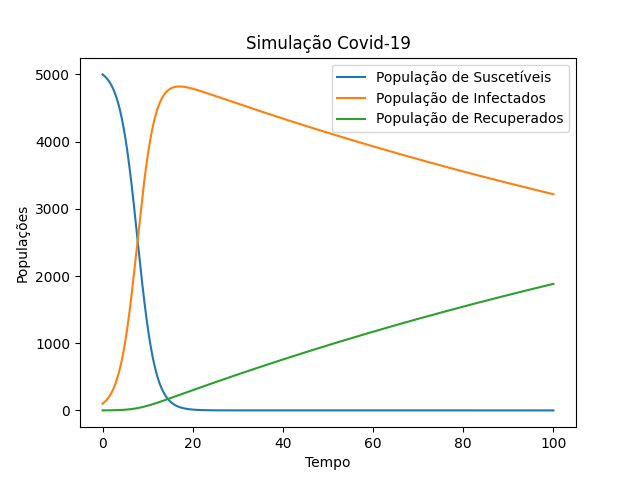

No gráfico acima, podemos ver que mesmo a população de infectados representando apenas 2% da população total, e com taxa de infecção de 0.01%, a simulação apresentou o estado de uma epidemia em que praticamente todos os indivíduos foram infectados. Evidenciando assim a necessidade de um imunizante para achatar a curva de infectados.

=> Número máximo de infectados - 4820


###**Simulação 2**

*   População Total - 500
*   População Suscetível - 490
*   População Infectada - 10
*   Taxa de Infecção - 0.001 (0.1%)
*   Taxa de Recuperação - 0.05 (5%)
*   Tempo de Simulação - 10000 dias



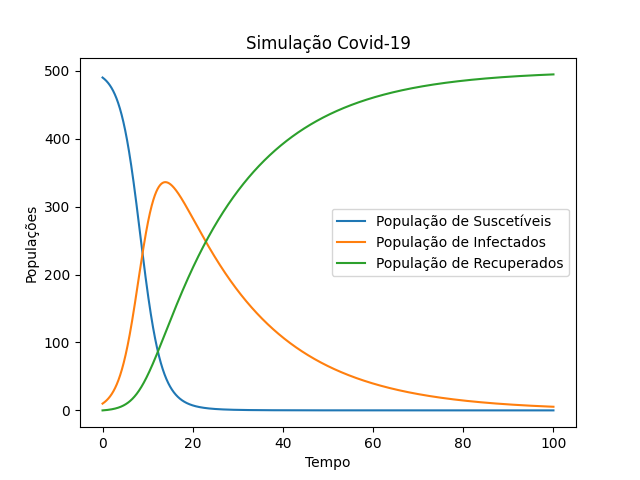

Neste gráfico, mantivemos uma proporção semelhante de infectados com relação aos suscetíveis (2%), mas desta vez, houve um aumento na taxa de recuperação natural do organismo da pessoa ao vírus (5% ao invés de 0.5%). Com isso, vemos que ela se tornou sim epidêmica, mas todos os que pegaram a doença conseguiram se recuperar. No entanto, sabemos que a covid-19 não é um vírus tão facilmente vencido pelo sistema imunológico natural, por isso, iremos agora simular essa recuperação tendo o auxílio da vacina.

=> Número máximo de infectados - 336

Obs: Note que neste gráfico podemos observar o "achatamento da curva"

#**Resultados com vacinação (10% de eficácia da vacina)**

###**Simulação 3**

*   População Total - 5100
*   População Suscetível - 5000
*   População Infectada - 100
*   Taxa de Infecção - 0.0001 (0.01%)
*   Taxa de Recuperação - 0.005 (0.5%)
*   Tempo de Simulação - 10000 dias
*   β (taxa de recuperação da vacina) - 10%

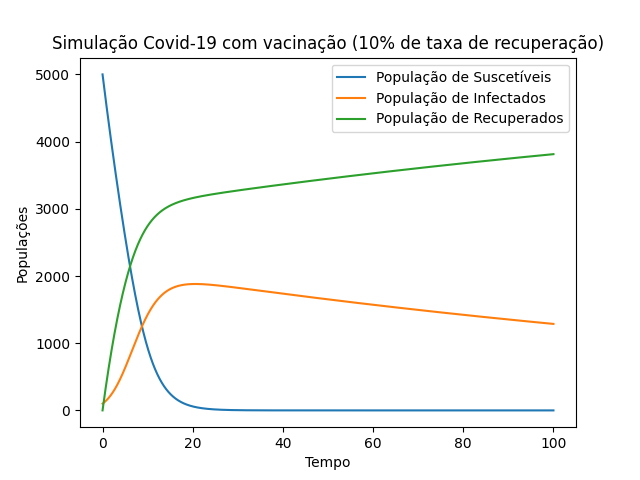

Na simulação acima, diferente das demais até agora, acrescentamos a vacina contra o vírus, e como esperado, a quantidade máxima de pessoas infectadas reduziu drasticamente (de 94% para 36%), bem como o número de recuperados que agora conta com quase 80% em detrimento aos 37% de antes da vacinação.

=> Número máximo de infectados - 1881

###**Simulação 4**

*   População Total - 500
*   População Suscetível - 490
*   População Infectada - 10
*   Taxa de Infecção - 0.001 (0.1%)
*   Taxa de Recuperação - 0.05 (5%)
*   Tempo de Simulação - 10000 dias
*   β (taxa de recuperação da vacina) - 10%

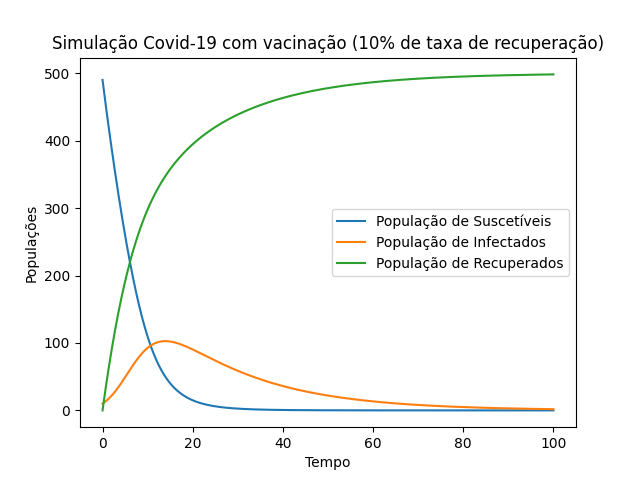

Agora em contraste com a simulação 2, acrescentamos a vacinação aliada a uma boa imunidade natural da população (característica própria dessa simulação pois a taxa de recuperação é de 5%). Como podemos observar, o achatamento da curva veio em um instante de tempo parecido, porém com muito menos intensidade, na simulação 2 tivemos um número máximo de 336 infectados e agora na simulação 4 apenas 102, são 62% contra 20%.

=> Número máximo de infectados - 102